In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from ramannoodles import spectrafit

In [2]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

In [4]:
# extract spectra data
data = shoyu_data_dict['WATER']
x_data = data['x']
y_data = data['y']

data_range = max(x_data) - min(x_data)
print(data_range,max(x_data),min(x_data))

3410.783 3799.46 388.677


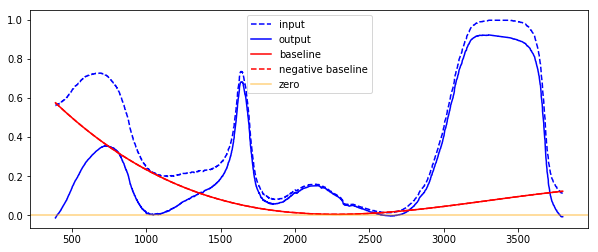

In [4]:
# subtract baseline
y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)

In [5]:
# detect peaks
peaks = spectrafit.find_peaks(x_data, y_data, thres=0.25, min_dist=50)
# from operator import itemgetter
#peaks = sorted(peaks, key=itemgetter(1), reverse=True)[:5]
peaks

[(688.07823325, 0.728), (1638.541057, 0.736), (3373.9794775, 0.999)]

In [6]:
# fig = plt.figure(figsize=(15,6))
# plt.plot(x_data, y_data)
# for i in range(len(peaks)):
#     plt.axvline(x=peaks[i][0], color='orange')

In [6]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [8]:
# fit the model to the data
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)

[[Model]]
    ((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1665
    # data points      = 3917
    # variables        = 12
    chi-square         = 41.3955454
    reduced chi-square = 0.01060065
    Akaike info crit   = -17797.9899
    Bayesian info crit = -17722.7129
[[Variables]]
    p1_sigma:      284.623913 (init = 1)
    p1_center:     678.078233 (init = 688.0782)
    p1_amplitude:  669.776995 (init = 1)
    p1_fwhm:       569.247826 == '2.0000000*p1_sigma'
    p1_height:     0.72800000 (init = 0.728)
    p2_sigma:      60.3296648 (init = 1)
    p2_center:     1637.55435 (init = 1638.541)
    p2_amplitude:  123.302110 (init = 1)
    p2_fwhm:       120.659330 == '2.0000000*p2_sigma'
    p2_height:     0.73600000 (init = 0.736)
    p3_sigma:      278.504927 (init = 1)
    p3_center:     3368.23894 (init = 3373.979)
    p3_amplitude:  992.516164 (init

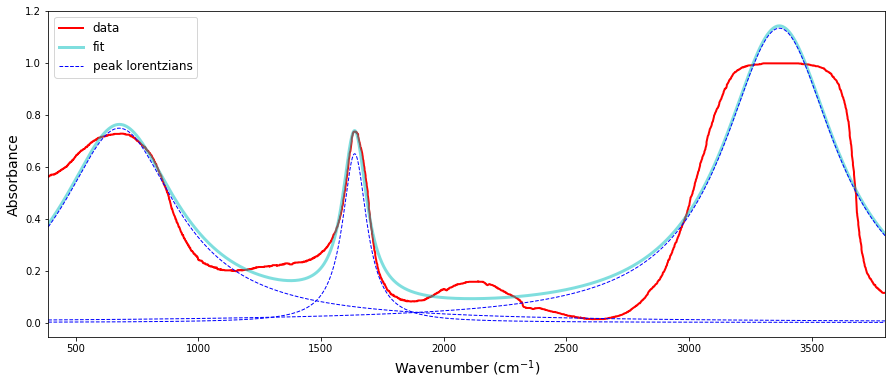

In [9]:
# plot fit results
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [10]:
# export data in logical structure (see docstring)
fit_peak_data = spectrafit.export_fit_data(out)
fit_peak_data

[array([129.86925278, 710.74018575, 147.73127602, 259.73850557,
        710.74018575]),
 array([1.31806219e+02, 7.55378188e+02, 3.71889475e-09, 2.63612438e+02,
        7.55378188e+02]),
 array([ 21.92354406, 811.65565613,   5.68829641,  43.84708811,
        811.65565613]),
 array([ 15.997878  , 854.48355021,   3.36831674,  31.995756  ,
        854.48355021]),
 array([  61.76557998, 1638.58247807,  126.34952945,  123.53115995,
        1638.58247807]),
 array([4.64444463e+02, 3.19780635e+03, 3.03045145e-09, 9.28888926e+02,
        3.19780635e+03]),
 array([2.75070763e+02, 3.25115420e+03, 2.13546949e-02, 5.50141526e+02,
        3.25115420e+03]),
 array([ 262.45996213, 3312.12132653,  864.69573761,  524.91992425,
        3312.12132653])]

In [11]:
# print docstring which outlines data structure
spectrafit.export_fit_data.__doc__

'\n    fit_peak_data[i][0] = p[i]_simga\n    fit_peak_data[i][1] = p[i]_center\n    fit_peak_data[i][2] = p[i]_amplitude\n    fit_peak_data[i][3] = p[i]_fwhm\n    fit_peak_data[i][4] = p[i]_center\n    '

In [12]:
peak_loc = []
peak_sigma = []
for i in range(len(fit_peak_data)):
    loc = fit_peak_data[i][1]
    sigma = fit_peak_data[i][0]
    peak_loc.append(loc)
    peak_sigma.append(sigma)


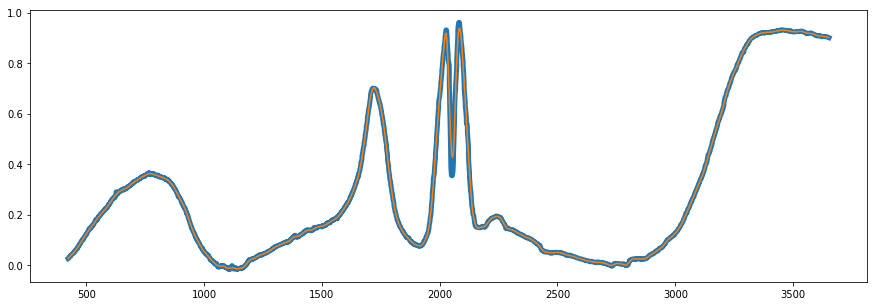

In [59]:
water = shoyu_data_dict['WATER']
x_water = water['x']
y_water = water['y']
y_water = spectrafit.subtract_baseline(y_water)


co = shoyu_data_dict['CARBON MONOXIDE']
x_co = co['x']
y_co = co['y']
y_co = spectrafit.subtract_baseline(y_co)

# x_pseudo = (co['x']+water['x'][:len(x_co)])/2
# y_pseudo =co['y']+water['y'][:len(x_co)]

x_pseudo = (x_co+x_water[:len(x_co)])/2
y_pseudo = y_co + y_water[:len(x_co)]
import rampy as rp
y_pseudo_smooth = rp.smooth(x_pseudo,y_pseudo,method="savgol",window_length=51, polyorder=3)

plt.figure(figsize = (15,5))
plt.plot(x_pseudo, y_pseudo, linewidth=5)
plt.plot(x_pseudo, y_pseudo_smooth)

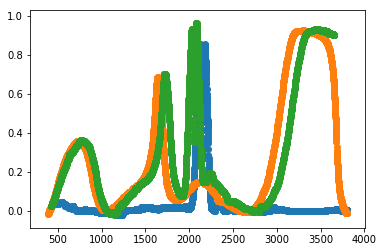

In [48]:
#compound_curve = (x_water+ x_co)
plot = plt.scatter(x_co, y_co)
plot = plt.scatter(x_water, y_water)
plot = plt.scatter(x_pseudo, y_pseudo)
#print(compound_curve)

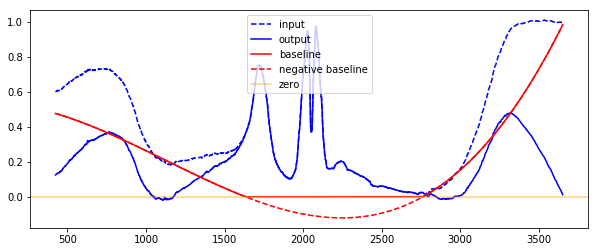

In [15]:
y_data = spectrafit.subtract_baseline(y_pseudo, deg=3, plot=True, x_data=x_pseudo)

In [60]:
# detect peaks
peaks = spectrafit.find_peaks(x_pseudo, y_pseudo_smooth, thres=0.25, min_dist=50)
# from operator import itemgetter
#peaks = sorted(peaks, key=itemgetter(1), reverse=True)[:5]
peaks

[(771.179657, 0.36234683279977675),
 (1721.1510235, 0.7025794464444219),
 (2026.1358853749998, 0.9178934014289261),
 (2083.74413675, 0.9375899526064706),
 (3382.753734, 0.920543375644921),
 (3458.435162375, 0.9306243836544768),
 (3531.857444, 0.9254841171331518)]

In [61]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [62]:
# fit the model to the data
out = spectrafit.model_fit(x_pseudo, y_pseudo, mod, pars, report=True)

[[Model]]
    ((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58000
    # data points      = 3574
    # variables        = 28
    chi-square         = 16.6983921
    reduced chi-square = 0.00470908
    Akaike info crit   = -19122.5424
    Bayesian info crit = -18949.4621
[[Variables]]
    p1_sigma:      150.009130 (init = 1)
    p1_center:     761.179657 (init = 771.1797)
    p1_amplitude:  179.364015 (init = 1)
    p1_fwhm:       300.018260 == '2.0000000*p1_sigma'
    p1_height:     0.36234683 (init = 0.3623468)
    p2_sigma:      65.4913018 (init = 1)
    p2_center:     1718.52208 (init = 1721.151)
    p2_amplitude:  136.735725 (init = 1)
    p2_fwhm:       130.982604 == '2.0000000*p2_sigma'
    p2_height:     0

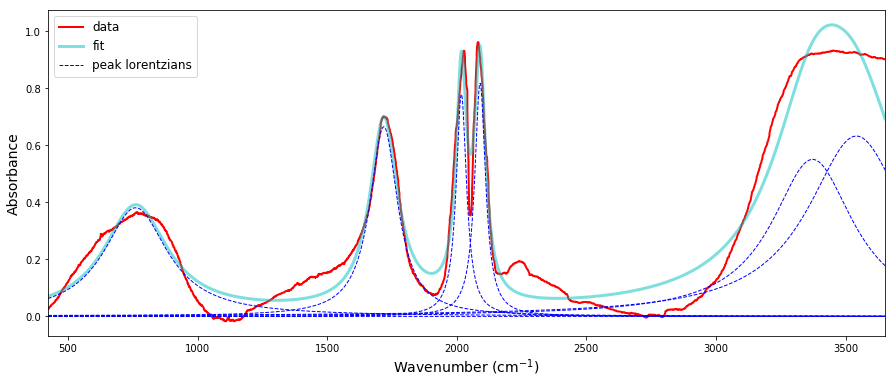

In [63]:
# plot fit results
spectrafit.plot_fit(x_pseudo, y_pseudo, out, plot_components=True)

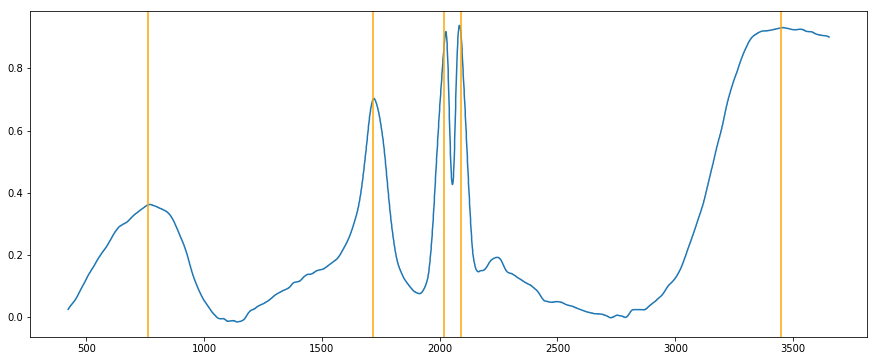

In [66]:
peaks2 = spectrafit.find_peaks(x_pseudo, out.best_fit, thres=0.25, min_dist=50)

fig = plt.figure(figsize=(15,6))
plt.plot(x_pseudo, y_pseudo_smooth)
for i in range(len(peaks2)):
    plt.axvline(x=peaks2[i][0], color='orange')

In [21]:
# export data in logical structure (see docstring)
fit_peak_data = spectrafit.export_fit_data(out)
fit_peak_data

[array([149.49582264, 512.59100625, 158.53162915, 298.99164529,
        512.59100625]),
 array([232.33912598, 565.938862  ,  91.24888348, 464.67825195,
        565.938862  ]),
 array([250.30218161, 613.84310447,  59.60634624, 500.60436323,
        613.84310447]),
 array([ 91.20871265, 663.07558678,  26.09318613, 182.41742531,
        663.07558678]),
 array([184.15706464, 716.93389163,  31.21927775, 368.31412929,
        716.93389163]),
 array([170.44046817, 775.3781875 ,  54.06106497, 340.88093633,
        775.3781875 ]),
 array([126.17588071, 822.19365375, 137.43684087, 252.35176142,
        822.19365375]),
 array([4.95145369e+02, 1.48035718e+03, 1.30817446e-09, 9.90290738e+02,
        1.48035718e+03]),
 array([2.70582407e+02, 1.53313549e+03, 1.73826331e-09, 5.41164815e+02,
        1.53313549e+03]),
 array([ 188.69498385, 1585.3946145 ,  140.84913123,  377.3899677 ,
        1585.3946145 ]),
 array([ 201.96293557, 1944.676095  ,  182.9911476 ,  403.92587114,
        1944.676095  ]),
 a

In [22]:
from ramannoodles import water


In [23]:
from ramannoodles import h2o

file already in raman_spectra folder
WATER loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE loaded into the dictionary - shoyu_data_dict.p


In [24]:

from ramannoodles import carbonmonoxide

file already in raman_spectra folder
WATER loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE loaded into the dictionary - shoyu_data_dict.p


[[Model]]
    (Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 130
    # data points      = 3574
    # variables        = 8
    chi-square         = 2.20981072
    reduced chi-square = 6.1969e-04
    Akaike info crit   = -26390.6199
    Bayesian info crit = -26341.1684
[[Variables]]
    p1_sigma:      26.8784904 (init = 1)
    p1_center:     2109.85482 (init = 2119.855)
    p1_amplitude:  66.7644635 (init = 1)
    p1_fwhm:       53.7569808 == '2.0000000*p1_sigma'
    p1_height:     0.85400000 (init = 0.854)
    p2_sigma:      21.1897865 (init = 1)
    p2_center:     2183.63592 (init = 2176.035)
    p2_amplitude:  52.0596254 (init = 1)
    p2_fwhm:       42.3795730 == '2.0000000*p2_sigma'
    p2_height:     0.85400000 (init = 0.854)



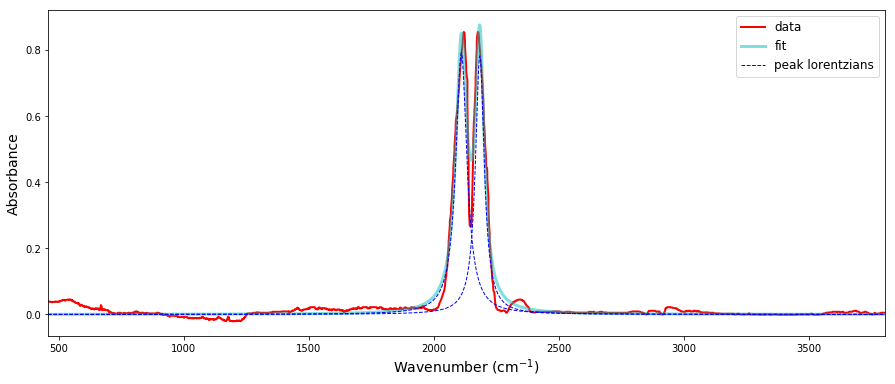

In [25]:
result = carbonmonoxide.CarbonMonoxide()


In [26]:
result

(457.865,
 3803.38,
 [26.878490421796574, 21.189786504992924],
 [2109.8548232024286, 2183.63591628543],
 [66.76446349713511, 52.059625373305245])

file already in raman_spectra folder
WATER loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE loaded into the dictionary - shoyu_data_dict.p
[[Model]]
    (((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_')) + Model(lorentzian, prefix='p8_'))
[[Fit Statistics]]
    #

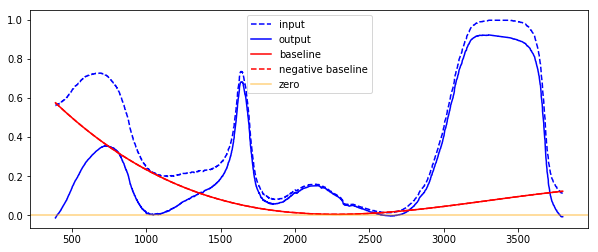

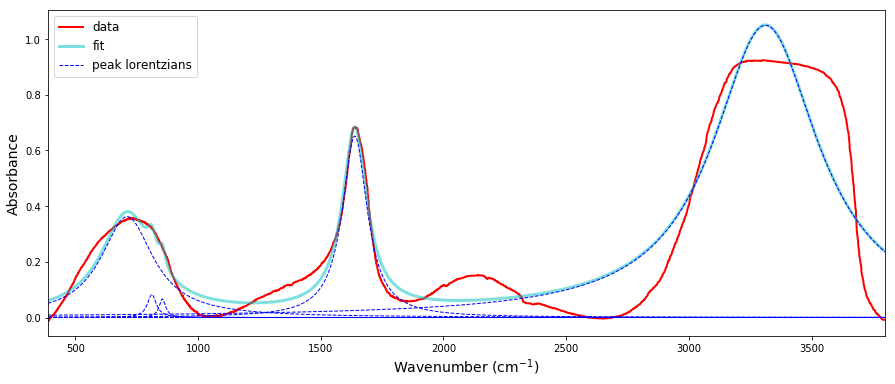

(388.677,
 3799.46,
 [129.86925278340982,
  131.80621912189278,
  21.923544055856752,
  15.997877997530747,
  61.7655799751633,
  464.44446278056057,
  275.0707630355018,
  262.4599621266227],
 [710.7401857500001,
  755.3781875000009,
  811.6556561329248,
  854.483550213899,
  1638.5824780695011,
  3197.80634625,
  3251.154203,
  3312.1213265252422],
 [147.73127602421314,
  3.7188947477062584e-09,
  5.688296411878437,
  3.3683167420445903,
  126.34952944517475,
  3.0304514453405318e-09,
  0.021354694883458647,
  864.6957376071796])

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import peakutils
import jcamp
from ramannoodles import shoyu
from ramannoodles import spectrafit
import pickle

shoyu.initialize_standard_library()
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

def h2o():
    data = shoyu_data_dict['WATER']
    x_data = data['x']
    y_data = data['y']

    data_range = max(x_data) - min(x_data)
    data_range
    xmin = data['x'].min()
    xmax = data['x'].max()
    xrange=xmax-xmin
    # subtract baseline
    y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)
    # detect peaks
    # detect peaks
    peaks = spectrafit.find_peaks(x_data, y_data, thres=0.25, min_dist=50)
    # assign parameters for least squares fit
    mod, pars = spectrafit.lorentz_params(peaks)
    # fit the model to the data
    out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)
    # plot fit results
    spectrafit.plot_fit(x_data, y_data, out, plot_components=True)
    # export data in logical structure (see docstring)
    fit_peak_data = spectrafit.export_fit_data(out)
    # print docstring which outlines data structure
    spectrafit.export_fit_data.__doc__
    center = [] 
    sigma = [] 
    amps = []
    for i in range(len(fit_peak_data)):
        sigma.append(fit_peak_data[i][0])
        center.append(fit_peak_data[i][1])  
        amps.append(fit_peak_data[i][2])
    return xmin,xmax,sigma,center,amps
h2o()

In [29]:
water.water()

UnboundLocalError: local variable 'mod' referenced before assignment